In [1]:
from pint.models import get_model
from pint.simulation import make_fake_toas_fromtim
from pint.logging import setup as setup_log
from pint.fitter import Fitter

from io import StringIO
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import corner

In [2]:
setup_log(level="WARNING")

1

In [3]:
m = get_model("sim1.par")

In [4]:
efac_vals = []
equad_vals = []
efac_errs = []
equad_errs = []

for idx in range(500):
    if idx % 20 == 0:
        print(idx)
    
    t = make_fake_toas_fromtim("sim1.tim", m, add_noise=True)

    ftr = Fitter.auto(t, m)
    ftr.fit_toas()

    efac_vals.append(ftr.model.EFAC1.value)
    equad_vals.append(ftr.model.EQUAD1.value)
    efac_errs.append(ftr.model.EFAC1.uncertainty_value)
    equad_errs.append(ftr.model.EQUAD1.uncertainty_value)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480


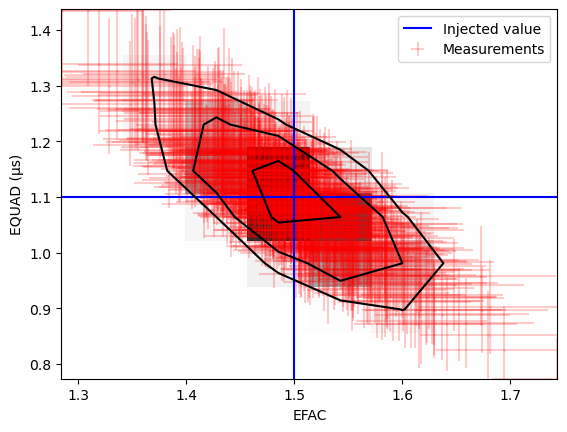

In [18]:
plt.errorbar(x=efac_vals, y=equad_vals, xerr=efac_errs, yerr=equad_errs, ls="", 
             label="Measurements", alpha=0.2, color="red")
plt.axvline(m.EFAC1.value, color="blue")
plt.axhline(m.EQUAD1.value, color="blue", label="Injected value")
corner.hist2d(np.array(efac_vals), np.array(equad_vals), bins=8, smooth=0.5)
plt.xlabel("EFAC")
plt.ylabel("EQUAD (μs)")
plt.legend()
plt.savefig("sim1-multisim.pdf")

In [9]:
corner.hist2d?

Signature:
corner.hist2d(
    x,
    y,
    bins=20,
    range=None,
    axes_scale=['linear', 'linear'],
    weights=None,
    levels=None,
    smooth=None,
    ax=None,
    color=None,
    quiet=False,
    plot_datapoints=True,
    plot_density=True,
    plot_contours=True,
    no_fill_contours=False,
    fill_contours=False,
    contour_kwargs=None,
    contourf_kwargs=None,
    data_kwargs=None,
    pcolor_kwargs=None,
    new_fig=True,
    force_range=False,
    **kwargs,
)
Docstring:
Plot a 2-D histogram of samples.

Parameters
----------
x : array_like[nsamples,]
   The samples.

y : array_like[nsamples,]
   The samples.

axes_scale : iterable (2,)
    Scale (``"linear"``, ``"log"``) to use for each dimension.

quiet : bool
    If true, suppress warnings for small datasets.

levels : array_like
    The contour levels to draw.

ax : matplotlib.Axes
    A axes instance on which to add the 2-D histogram.

plot_datapoints : bool
    Draw the individual data points.

plot_density : b